In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
frases = [
    "El perro ladra y canta y además grita",
    "El gato maulla",
    "El pájaro canta",
    "El pez nada"
]

In [ ]:
vectorizador = CountVectorizer()

In [ ]:
X = vectorizador.fit_transform(frases)

In [ ]:
print(vectorizador.get_feature_names_out())

['además' 'canta' 'el' 'gato' 'grita' 'ladra' 'maulla' 'nada' 'perro'
 'pez' 'pájaro']


In [ ]:
print(X.toarray())

[[1 1 1 0 1 1 0 0 1 0 0]
 [0 0 1 1 0 0 1 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0 1]
 [0 0 1 0 0 0 0 1 0 1 0]]


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('df_total.csv')
data

,url,news,Type
0,https://www.larepublica.co/redirect/post/3201905,Durante el foro La banca articulador empresari...,Otra
1,https://www.larepublica.co/redirect/post/3210288,El regulador de valores de China dijo el domin...,Regulaciones
2,https://www.larepublica.co/redirect/post/3240676,En una industria históricamente masculina como...,Alianzas
3,https://www.larepublica.co/redirect/post/3342889,Con el dato de marzo el IPC interanual encaden...,Macroeconomia
4,https://www.larepublica.co/redirect/post/3427208,Ayer en Cartagena se dio inicio a la versión n...,Otra
...,...,...,...
1212,https://www.bbva.com/es/como-lograr-que-los-in...,En la vida de toda empresa emergente llega un ...,Innovacion
1213,https://www.bbva.com/es/podcast-como-nos-afect...,La espiral alcista de los precios continúa y g...,Macroeconomia
1214,https://www.larepublica.co/redirect/post/3253735,Las grandes derrotas nacionales son experienci...,Alianzas
1215,https://www.bbva.com/es/bbva-y-barcelona-healt...,BBVA ha alcanzado un acuerdo de colaboración c...,Innovacion


In [ ]:
X = data['news']
X

,news
0,Durante el foro La banca articulador empresari...
1,El regulador de valores de China dijo el domin...
2,En una industria históricamente masculina como...
3,Con el dato de marzo el IPC interanual encaden...
4,Ayer en Cartagena se dio inicio a la versión n...
...,...
1212,En la vida de toda empresa emergente llega un ...
1213,La espiral alcista de los precios continúa y g...
1214,Las grandes derrotas nacionales son experienci...
1215,BBVA ha alcanzado un acuerdo de colaboración c...


In [ ]:
y = data['Type']
y

,Type
0,Otra
1,Regulaciones
2,Alianzas
3,Macroeconomia
4,Otra
...,...
1212,Innovacion
1213,Macroeconomia
1214,Alianzas
1215,Innovacion


In [ ]:
vectorizador = CountVectorizer()

In [ ]:
X = vectorizador.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[32,  5,  9,  3,  2,  0,  1],
       [ 3, 20,  7,  1,  1,  0,  1],
       [ 3,  3, 66,  0,  1,  0,  0],
       [ 7,  1,  7, 13,  1,  0,  0],
       [ 7,  2,  9,  0,  6,  0,  0],
       [ 3,  0,  5,  0,  1,  0,  0],
       [ 1,  4,  6,  1,  1,  0, 11]])

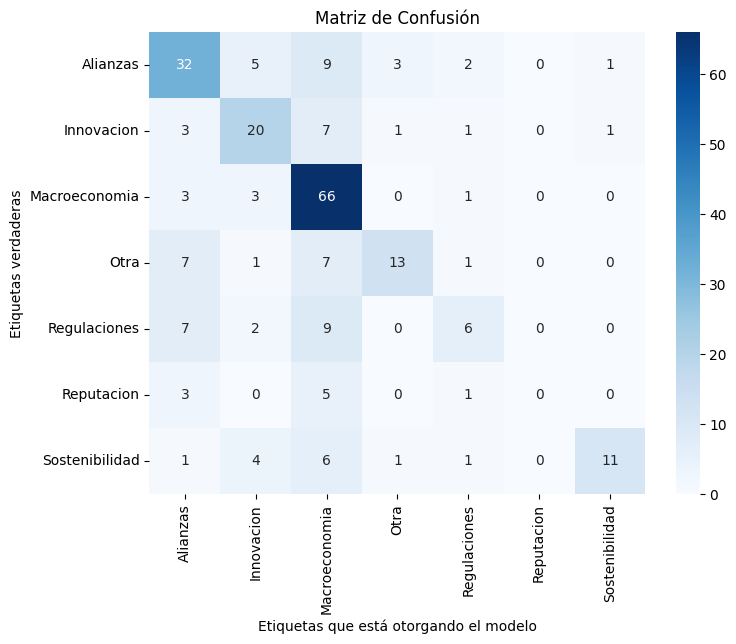

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap='Blues', xticklabels=knn.classes_, yticklabels=knn.classes_, annot=True)
plt.xlabel('Etiquetas que está otorgando el modelo')
plt.ylabel('Etiquetas verdaderas')
plt.title('Matriz de Confusión')
plt.show()

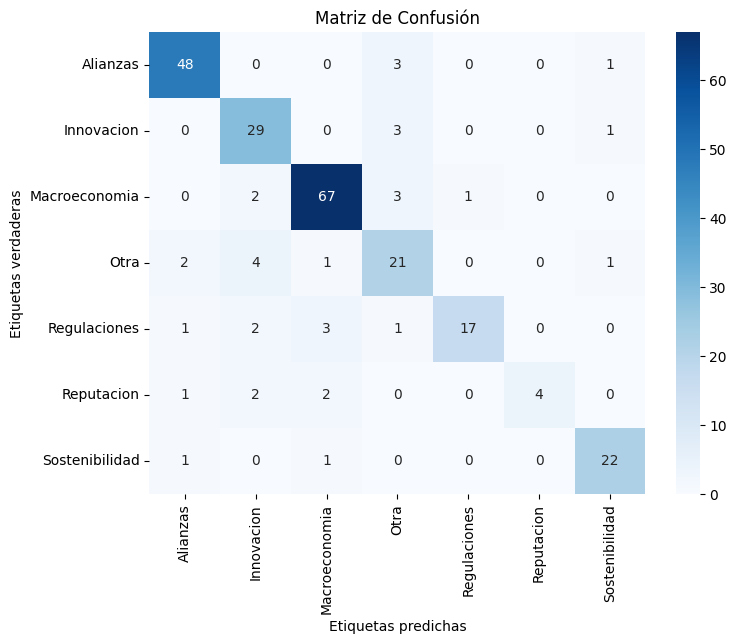

Precisión del clasificador MLP:  85.24590163934425 %


In [ ]:
from sklearn.neural_network import MLPClassifier
# Crear y entrenar el modelo MLP
modelo = MLPClassifier(hidden_layer_sizes=(100, 70), max_iter=1000, random_state=42)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=modelo.classes_, yticklabels=modelo.classes_)
plt.xlabel('Etiquetas predichas')
plt.ylabel('Etiquetas verdaderas')
plt.title('Matriz de Confusión')
plt.show()
print("Precisión del clasificador MLP: ", accuracy * 100, "%")